# Исследование объявлений о продаже квартир 

**Описание проекта
-***
В распоряжении имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге за несколько лет. Требуется научиться определять рыночную стоимость объектов недвижимости,  установить параметры для построения автоматизированной системы, отслеживающей аномалии и мошеннические действия.
***
**Вопросы для исследования:
***
-***
•	Каковы типичные параметры продаваемых квартир (например, площадь, цена)?  Сколько обычно длится процесс продажи?
***
•	Убрать квартиры с очень высокой ценой и другими необычными параметрами. Описать, какие особенности обнаружены.
***
•	Какие факторы больше всего влияют на стоимость квартиры? 
Зависит ли цена квадратного метра: от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.
***
•	Что можно сказать о цене квадратного метра в пригородах? 
Выбрать 10 населённых пунктов с наибольшим числом объявлений.
***
•	Выделить сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. 
Границы определить самостоятельно. 
Выбрать крупные сегменты с не менее 1000 объявлений. 
Сравнить корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.
***
•	Подобрать наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравнить со схожими параметрами квартир типовой планировки.
***
**Источник данных:
-***
Сервис Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге за несколько лет,
файл со статистикой: /datasets/real_estate_data.csv
***
По каждой продаваемой квартире есть два вида данных. Первые — вносили сами пользователи при публикации объявлений, вторые — получены на основе картографических данных: расстояния до центра, аэропорта, ближайшего парка и водоёма.

## Задание 1 . Подготовка данных
***
### Шаг 1. Открываем файл с данными и оцениваем общую информацию.

In [1]:
# импорт библиотек для проекта:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Настройка окружения
# показывать все столбцы
pd.options.display.max_columns = None
# настройка формата вывода столбцов float - 2 знака после запятой
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df_real_estate = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df_real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


### Шаг 2. Подготовка данных

**Инструкция по выполнению Задания 1.
***
Задание 1. Начните исследование
-***
Шаг 2. Подготовка данных
•	определите и заполните пропущенные значения;
•	приведите данные к нужным типам.
Посчитайте и добавьте в таблицу:
•	цену квадратного метра;
•	день недели, месяц и год публикации объявления;
•	этаж, на котором расположена квартира; варианты — первый, последний, другой;
•	соотношение жилой и общей площади, а также отношение площади кухни к общей.
Поясните:
•	какие пропущенные значения обнаружены;
•	в чём возможные причины возникновения пропусков;
•	в каких столбцах потребовалось изменить тип данных и почему;
•	по какому принципу заполнены пропуски.

In [3]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
# для удобства упорядочивается порядок столбцов, чтобы однотипные данные были рядом
df_real_estate = df_real_estate[['rooms', 'ceiling_height', 
        'total_area', 'living_area', 'kitchen_area', 
        'floors_total', 'floor',
        'balcony','is_apartment', 'studio',  'open_plan',
        'total_images', 'last_price', 'first_day_exposition', 'days_exposition', 
        'locality_name', 
        'airports_nearest', 'cityCenters_nearest', 
        'parks_around3000', 'parks_nearest',
        'ponds_around3000', 'ponds_nearest']]
df_real_estate.head()

,rooms,ceiling_height,total_area,living_area,kitchen_area,floors_total,floor,balcony,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,3,2.70,108.00,51.00,25.00,16.00,8,nan,NaN,False,False,20,"13,000,000.00",2019-03-07T00:00:00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00
1,1,nan,40.40,18.60,11.00,11.00,1,2.00,NaN,False,False,7,"3,350,000.00",2018-12-04T00:00:00,81.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan
2,2,nan,56.00,34.30,8.30,5.00,4,0.00,NaN,False,False,10,"5,196,000.00",2015-08-20T00:00:00,558.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00
3,3,nan,159.00,nan,nan,14.00,9,0.00,NaN,False,False,0,"64,900,000.00",2015-07-24T00:00:00,424.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00
4,2,3.03,100.00,32.00,41.00,14.00,13,nan,NaN,False,False,2,"10,000,000.00",2018-06-19T00:00:00,121.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00


In [5]:
# в массиве были два идентичных столбца 'total_area' и 'area'
# в этом месте 'area' удадлялся. 

In [6]:
# проверка уникальных значений для составления плана обработки
for column in df_real_estate.columns:
    print(column, '\n', df_real_estate[column].unique())
    print(df_real_estate[column].dtype)
    print('Количество пропусков:', df_real_estate[column].isna().sum(), '\n')
    

rooms 
 [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
int64
Количество пропусков: 0 

ceiling_height 
 [  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46 

##### План предобработки данных
***
'building_series_id' - удален в последей версии бд
многие номера проектов содержат суффикс '.0', скорее всего это ошибка формата. Проверить и если необходимо - убрать.
Типовой проект постройки. Анализ зависимостей от вида проекта для целей исследования не требуется, но скорее всего квартиры для одного проекта должны обладать сходными параметрами. Можно использовать для верификации остальных данных и заполнения недостающих данных.

***
ceiling_height - формат оставляем. есть явно ошибочные данные с высотой потолков 100 м, оценить количество и если их немного, убрать.
Пропусков очень много - 9195, попробовать восстановить по номеру проекта, во всех случаях оставляем для анализа.
***
living_area и kitchen_area - формат оставляем. Пропусков 1903 и 2278 соответственно.
Проверка на достоверность - площадь не может быть больше общей.
***
'floors_total ' - преобразовать в int. пропусков - 86 - пропусков немного и данные необходимы для анализа - удалить пропуски.
***
balcony - преобразовать в int. Пропуски оставляем.
***
is_apartment - формат преобразовать в bool. 
Пропусков очень много - 20924, оставляем
***
first_day_exposition - преобразовать в datetime 
Пропусков 3181 - много, будем убирать только если потребуется.
***
locality_name - формат оставляем. Пропусков 49 - доля незначительна, удалить. 
Визуально видно, что встречается два вида написания "посёлок" и "поселок". Заменить "ё" на "е", грамматически не корректно, но эффективно для целей исследования. Возможно в отдельных записях указан тип населенного пункта, а каких-то - нет, проверить.
***
airports_nearest , cityCenters_nearest, parks_around3000, ponds_around3000, parks_nearest, ponds_nearest - преобразовать в int 
Пропусков около 5000 будем удалять только для отдельного исследования.
***
**ИТОГО:
-***
удалить пропуски по 'floors_total' и  'locality_name'
их немного: 86 и 49, и это параметры без которых нельзя расчитать остальные удельные показатели.
***
Заменить формат:
на 'bool': 
'is_apartment'
***
на 'int' 
(для balcony, floors_total , days_exposition - они не могут быть дробными, для остальных для экономии размера бд):
'balcony', 'airports_nearest' , 'cityCenters_nearest', 
'parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest'
***
на 'datetime' в 'first_day_exposition' 
***
Проверить на достоверность:
ceiling_height, living_area и kitchen_area 


### Удаление пропущенных значений

In [7]:
# удалем пропущенные значения в 'floors_total' и  'locality_name'
df_real_estate.dropna(subset=['floors_total', 'locality_name'], inplace=True)
df_real_estate.reset_index(drop=True, inplace=True)

# число оставшихся записей:
df_real_estate.shape[0]

23565

### Преобразование типа данных в выбранных колонках

In [8]:
# перевод формата в 'int'
for column in df_real_estate[['balcony', 'floors_total', 'days_exposition', 
    'airports_nearest' , 'cityCenters_nearest', 
    'parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest']]:
    df_real_estate[column] = df_real_estate[column].astype('int', errors='ignore')

# перевод 'is_apartment' в 'bool'
# неизвестные значения заменяем на False (апартаменты - относительно новый формат недвижимости, 
# эта графа могла отсутствовать в объявлениях ранее. После добавления новых столбцов с данными эта гипотеза 
# проверяется и подтверждается: основная часть объявлений появлется с 2018г.)
df_real_estate.loc[df_real_estate['is_apartment'] !=True, 'is_apartment'] = False
df_real_estate['is_apartment'] = df_real_estate['is_apartment'].astype(bool)

# перевод 'first_day_exposition' в 'datetime'
df_real_estate['first_day_exposition'] = pd.to_datetime(df_real_estate['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

### Проверка на достоверность и удаление соответствующих записей

##### 'ceiling_height'

In [9]:
# 'ceiling_height', высота потолков, число значений больше 10м: 
df_real_estate['ceiling_height'].loc[df_real_estate['ceiling_height'] > 10].shape[0]

25

In [10]:
# для сомнительных предложений с высотой потолка болле 10м - 25, преобразуем их в NaN
df_real_estate.loc[df_real_estate['ceiling_height'] > 10, 'ceiling_height'] = np.nan
# проверка (кол-во предложений с высотой потолка болле 10м)
df_real_estate['ceiling_height'].loc[df_real_estate['ceiling_height'] > 10].shape[0]

0

##### 'locality_name'

In [11]:
# Проверим какие населенные пункты с наиболишим числом объявлений
print('Число значений:', df_real_estate['locality_name'].value_counts().shape[0])
df_real_estate['locality_name'].value_counts()[:15]

Число значений: 364


Санкт-Петербург            15651
посёлок Мурино               520
посёлок Шушары               439
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
Кудрово                      171
деревня Новое Девяткино      143
Name: locality_name, dtype: int64

In [12]:
# замена "ё" на "е" в названиях населенных пунктов
df_real_estate['locality_name'] = df_real_estate['locality_name'].str.replace('ё', 'е')

In [13]:
# В отдельных записях указан тип населенного пункта, а каких-то - нет. Проверяем на предмет совпадений и выявляем крупные.

# создание таблицы названий населенных пунктов df_locality_name
df_locality_name = pd.DataFrame(df_real_estate['locality_name'].value_counts())
df_locality_name.set_axis(['count'], axis='columns', inplace=True)
df_locality_name['locality_name'] = df_locality_name.index
df_locality_name.index = range(len(df_locality_name.index))

# создание столбца с кортокими названиями по последнему слову
short_locality_name = []
for vol in df_locality_name['locality_name']:
    word = vol.split()
    short_locality_name.append(*word[-1:])
df_locality_name['short_locality_name'] = short_locality_name

# создание столбца с логическим типом (встречается название один или несколько раз)
multy_locality = []
for vol in df_locality_name['short_locality_name']:
    if vol in df_locality_name['short_locality_name'].value_counts()[lambda x: x>= 2].index:
        multy_locality.append(True)
    else:
        multy_locality.append(False)
df_locality_name['multy_locality']  = multy_locality


# создание списка для вывода по условиям: название нас. пункта встречаются несколько раз, число объявлений больше 50  
dict_name = (
     df_locality_name
     .loc[(df_locality_name['multy_locality'] == True) & (df_locality_name['count'] > 50)] 
     .pivot_table(index=['short_locality_name','locality_name'] , values='count', aggfunc=('sum'))
     .index.levels[0]
)

# итоговая таблица с названиями нас. пунктов, которые встречаются в разных вариациях:
(df_locality_name
    .query('short_locality_name in @dict_name')
    .pivot_table(index=['short_locality_name','locality_name'] , values='count', aggfunc=('sum'))
)

count
short_locality_name locality_name                             
Бор                 Сосновый Бор                            87
                    деревня Бор                              2
                    деревня Трубников Бор                    1
                    деревня Чудской Бор                      1
                    поселок Пансионат Зеленый Бор            2
                    поселок городского типа Красный Бор      8
Кудрово             Кудрово                                171
                    деревня Кудрово                        299
Мурино              Мурино                                  34
                    поселок Мурино                         552
Никольское          Никольское                              93
                    село Никольское                          1

Выявлены повторы вариантов написания названий с большим числом объявлений.
По результатам итоговой таблицы видно, что слово Бор встречается в названиях разных населенные пунктов. 
В данной работе не будем углубляться в географию, считаем что информация проверена по карте. 
***
Объединяем данные по разным вариантам написания Кудрово и Мурино, остальные игнорируем. 
Для целей нашего исследования нужны наиболее крупные нас. пункты. Названия, которые встречается менее чем в 100 объявлениях, не рассмартиваются и в случае необходимости будут объединены в "прочие".

In [14]:
# 'locality_name' - объединяем записи с названиями нас. пунктов Кудрово и Мурино.
df_real_estate['locality_name'].replace(['Кудрово', 'Мурино'], ['деревня Кудрово', 'поселок Мурино'], inplace=True)
    
# проверка результата:
df_real_estate['locality_name'].value_counts()[:11]

Санкт-Петербург      15651
поселок Мурино         586
деревня Кудрово        470
поселок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
Выборг                 237
Петергоф               201
Name: locality_name, dtype: int64

Все получилось. TOP-10 поменялся: Кудрово вырывается вперед, Шушары позади. (формулировка - навеяна тренажером)

### Добавление новых столбцов с данными
Посчитайте и добавьте в таблицу:
•	цену квадратного метра;
•	день недели, месяц и год публикации объявления;
•	этаж, на котором расположена квартира; варианты — первый, последний, другой;
•	соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [15]:
# 'price_sqm' - расчет стоимости квадратного метра 
df_real_estate['price_sqm'] = df_real_estate['last_price'] / df_real_estate['total_area']

# год, месяц и день недели размещения объявления
df_real_estate['year'] = df_real_estate['first_day_exposition'].dt.year
df_real_estate['month'] = df_real_estate['first_day_exposition'].dt.month
df_real_estate['weekday'] = df_real_estate['first_day_exposition'].dt.weekday

# 'floor_level' - этаж квартиры, категории : первый, последний, другой
def floor_level(row):
    try:
        if row['floor'] == 1:
            return('первый')
        elif row['floor'] == row['floors_total']:
            return('последний')
        else:
            return('другой')
    except:
        return('NaN')
df_real_estate['floor_level'] = df_real_estate.apply(lambda row: floor_level(row), axis=1)    


# отношение площади жилой к общей 
df_real_estate['proportion_living'] = df_real_estate['living_area'] / df_real_estate['total_area']

# отношение площади кухни к общей 
df_real_estate['proportion_kitchen'] = df_real_estate['kitchen_area'] / df_real_estate['total_area']

# проверка результата
df_real_estate.head()

,rooms,ceiling_height,total_area,living_area,kitchen_area,floors_total,floor,balcony,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_sqm,year,month,weekday,floor_level,proportion_living,proportion_kitchen
0,3,2.70,108.00,51.00,25.00,16,8,nan,False,False,False,20,"13,000,000.00",2019-03-07,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,"120,370.37",2019,3,3,другой,0.47,0.23
1,1,nan,40.40,18.60,11.00,11,1,2.00,False,False,False,7,"3,350,000.00",2018-12-04,81.00,поселок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,"82,920.79",2018,12,1,первый,0.46,0.27
2,2,nan,56.00,34.30,8.30,5,4,0.00,False,False,False,10,"5,196,000.00",2015-08-20,558.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,"92,785.71",2015,8,3,другой,0.61,0.15
3,3,nan,159.00,nan,nan,14,9,0.00,False,False,False,0,"64,900,000.00",2015-07-24,424.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,"408,176.10",2015,7,4,другой,nan,nan
4,2,3.03,100.00,32.00,41.00,14,13,nan,False,False,False,2,"10,000,000.00",2018-06-19,121.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,"100,000.00",2018,6,1,другой,0.32,0.41


##### is_apartment  - проверка гипотезы

In [16]:
# Проверим динамику размещения объявлений в категории апартаменты 'is_apartment'
df_real_estate.query('is_apartment ==True').groupby('year')['year'].count()

year
2014     2
2015     3
2016     4
2017     4
2018    29
2019     8
Name: year, dtype: int64

Позиция 'апартаменты' начала резко расти только с 2018г., при семикратном росте по сравнению с 2017, эти объявления остаются единичными - 29 в 2018 максимальном году. В 2019 статистика неполная и выводы делать преждевременно.

### Выводы по Заданию 1.
***
Выполнено преобразование необходимых стобцов по типу данных
Удалены пропущенные значения в столбцах в 'floors_total' и  'locality_name'
Сомнительные объявления с высотой потолка болле 10м (25 шт), преобразовыны по параметру ceiling_height в NaN 
***
Выявлены повторы вариантов написания названий с большим числом объявлений.
Объединены данные по разным вариантам написания Кудрово и Мурино. TOP-10 поменялся: Кудрово вышел на позицию перед Шушарами.
Остальные записи оставлены без изменений, посольку для данного исследования нужны наиболее крупные нас. пункты. Названия, которые встречается менее чем в 100 объявлениях, не рассмартиваются и в случае необходимости будут объединены в "прочие".
***
Добавлены новые столбцы в таблицу:
price_sqm - цена квадратного метра; 
year, month, weekday - день недели, месяц и год публикации объявления; 
floor_level этаж, на котором расположена квартира; варианты — первый, последний, другой; 
proportion_living - отношение жилой и общей площади, 
proportion_kitchen - отношение площади кухни к общей.

## Задание 2. Исследовательский анализ данных 

### Выявление и удаление некоректных  данных


#### Выявление квартир с очень высокой ценой и другими необычными параметрами. 
•	Каковы типичные параметры продаваемых квартир (например, площадь, цена)? 
Наиболее важные характеристики и постройте графики. 
Сколько обычно длится процесс продажи?
•	Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

In [17]:
# Для первичного анализа используем праметры цены квадратного метра и общей площади ['price_sqm', 'total_area']
# Цена квадратного метра - оптимальная сводная характеристика для исследования экстремальных значений площади и общей цены
# метод describe()
for column in ['price_sqm', 'total_area']:
    print(df_real_estate[column].describe())
    print()

count      23,565.00
mean       99,405.84
std        50,389.43
min           111.83
25%        76,566.13
50%        95,000.00
75%       114,213.20
max     1,907,500.00
Name: price_sqm, dtype: float64

count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64



Text(0.5, 1.0, 'Нижний сегмент')

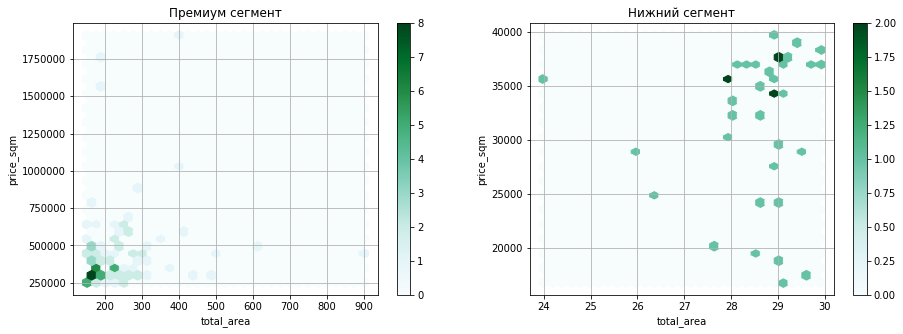

In [18]:
# По цене 1 м2 есть аномальное мин. значение 111 руб. - удалить
# Для премиум диапазона берем границу удвоенного 3-го квартиля 250000 руб/м2 и площадь больше 150 м2
# Анализ распределения делаем методом построения ячеичной диаграммы.
# Строим ячеечную диаграмму для премиум и нижнего ценовго сегмента, чтобы определить границы "выбросов"
fig, axs=plt.subplots(1, 2, figsize=(15,5))
(df_real_estate
    .query('price_sqm > 250000 and total_area > 150')
    .plot(x='total_area' , y = 'price_sqm' , kind='hexbin', sharex=False, gridsize=30, ax = axs[0], grid=True)
)
(df_real_estate
    .query('price_sqm < 40000 and total_area < 30')
    .plot(x='total_area' , y = 'price_sqm' , kind='hexbin', sharex=False, gridsize=30, ax = axs[1], grid=True)
)
axs[0].set_title('Премиум сегмент')
axs[1].set_title('Нижний сегмент')


Среди дорогих квартир есть выраженный премиум сегмент, устанавливаем верхнюю границу цены 750 000 руб/м2 и площади 600 м2.  Подсчет числа квартир выходящих за параметры:

In [19]:
print('Количество квартир с ценой м2 меньше 1000 руб/м2:', df_real_estate.query('price_sqm < 1000').shape[0], 'шт.')
print('Количество квартир с ценой м2 больше 750 000 руб/м2:', df_real_estate.query('price_sqm > 750000').shape[0], 'шт.')
print('Количество квартир общей площадью больше 600 м2:', df_real_estate.query('total_area > 600').shape[0], 'шт.')

Количество квартир с ценой м2 меньше 1000 руб/м2: 1 шт.
Количество квартир с ценой м2 больше 750 000 руб/м2: 10 шт.
Количество квартир общей площадью больше 600 м2: 4 шт.


In [20]:
# вывод записей с исключительными параметрами
df_real_estate.query('price_sqm > 750000 or total_area > 600 or price_sqm < 1000')

,rooms,ceiling_height,total_area,living_area,kitchen_area,floors_total,floor,balcony,is_apartment,studio,open_plan,total_images,last_price,first_day_exposition,days_exposition,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_sqm,year,month,weekday,floor_level,proportion_living,proportion_kitchen
1431,3,3.50,190.00,95.00,40.00,7,5,nan,False,False,False,19,"330,000,000.00",2018-04-04,233.00,Санкт-Петербург,"23,011.00","1,197.00",3.00,519.00,3.00,285.00,"1,736,842.11",2018,4,2,другой,0.50,0.21
3103,7,nan,631.00,nan,60.00,5,5,nan,False,False,False,19,"140,000,000.00",2019-03-30,nan,Санкт-Петербург,"25,707.00","4,972.00",0.00,nan,2.00,210.00,"221,870.05",2019,3,5,последний,nan,0.10
4835,1,3.50,33.00,nan,nan,5,2,nan,False,False,False,16,"28,000,000.00",2019-04-29,nan,Санкт-Петербург,"23,447.00","1,376.00",3.00,344.00,3.00,119.00,"848,484.85",2019,4,0,другой,nan,nan
4971,4,3.00,124.50,67.20,20.00,4,2,nan,False,False,False,20,"124,000,000.00",2017-10-12,45.00,Санкт-Петербург,"20,399.00","1,722.00",3.00,302.00,3.00,172.00,"995,983.94",2017,10,3,другой,0.54,0.16
8750,2,2.75,109.00,32.00,40.50,25,25,nan,False,False,False,7,"12,190.00",2019-03-20,8.00,Санкт-Петербург,"36,421.00","9,176.00",1.00,805.00,0.00,nan,111.83,2019,3,2,последний,0.29,0.37
12787,7,3.90,631.20,322.30,19.50,4,4,1.00,False,False,False,20,"140,000,000.00",2019-04-09,nan,Санкт-Петербург,"25,707.00","4,972.00",0.00,nan,2.00,210.00,"221,799.75",2019,4,1,последний,0.51,0.03
12897,7,nan,400.00,250.00,nan,10,10,2.00,False,False,False,19,"763,000,000.00",2017-09-30,33.00,Санкт-Петербург,"25,108.00","3,956.00",1.00,530.00,3.00,756.00,"1,907,500.00",2017,9,5,последний,0.62,nan
14621,5,nan,401.00,204.00,24.00,9,9,3.00,False,False,False,15,"401,300,000.00",2016-02-20,393.00,Санкт-Петербург,"21,912.00","2,389.00",1.00,545.00,1.00,478.00,"1,000,748.13",2016,2,5,последний,0.51,0.06
15565,7,3.40,618.00,258.00,70.00,7,5,nan,False,False,False,20,"300,000,000.00",2017-12-18,111.00,Санкт-Петербург,"32,440.00","5,297.00",0.00,nan,2.00,198.00,"485,436.89",2017,12,0,другой,0.42,0.11
16372,6,3.35,285.70,182.80,29.80,7,4,nan,False,False,False,17,"245,000,000.00",2017-04-10,249.00,Санкт-Петербург,"33,143.00","6,235.00",3.00,400.00,3.00,140.00,"857,542.88",2017,4,0,другой,0.64,0.10


Все выявленные квартиры отличаются высокими потолками, большинство от 3,5 м, и близко к центру города,
остальные характеристики очень разнообразны.
Влияние на цену здесь может оказывать расположение в исторических зданиях, элитных новостройках или возле объектов социального притяжения.

In [21]:
# очищаем массив данных от выбросов по тсоимости и площади:
df_real_estate = df_real_estate.query('price_sqm < 750000 and total_area < 600 and price_sqm > 1000')

Text(0.5, 1.0, 'last_price')

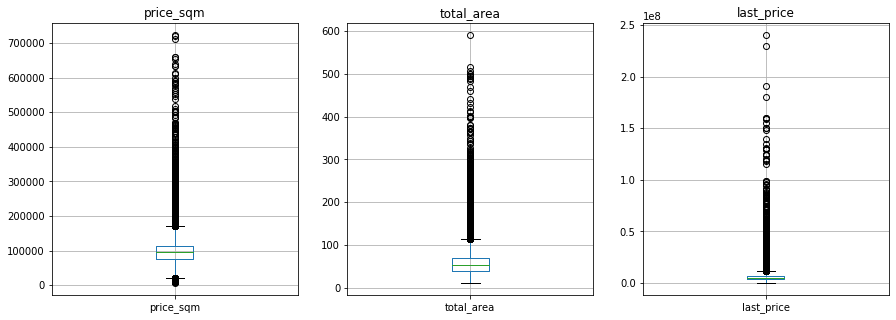

In [22]:
# проверим новое распределение цен и общей площади:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
df_real_estate.boxplot('price_sqm', ax=axs[0])
df_real_estate.boxplot('total_area', ax=axs[1]) 
df_real_estate.boxplot('last_price', ax=axs[2])
axs[0].set_title('price_sqm')
axs[1].set_title('total_area')
axs[2].set_title('last_price')

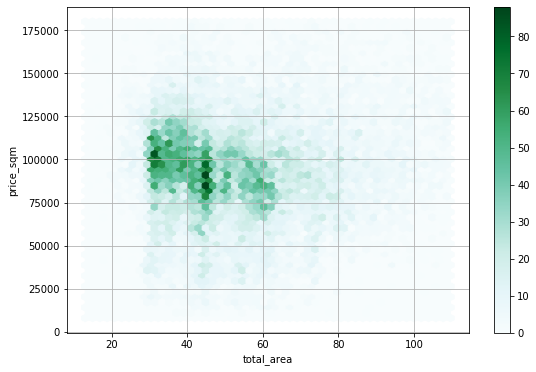

In [23]:
# Основной диапазон объявлений находится с ценами до 180 000 руб/м2 и площадями до 110 м2
# Проверяем распределение числа объявлений в этом диапазоне:
(df_real_estate
     .query('price_sqm < 180000 and total_area < 110')
    .plot(x='total_area' , y = 'price_sqm' , kind='hexbin', gridsize=50, sharex=False, figsize=(9, 6), grid=True)
)

**Выводы: Наиболее массовый сегмент рынка недвижимости СПб- квартиры площадью 30-70 м2 и ценой от 60 до 120 тыс.руб/м2.
*** 
Четко просматриваются группировки объвлений для квартир общей площадью 35, 45 и 60м2, что указывает на преобладание на рынке определенных типовых квартир.

In [24]:
# сделаем группировку для найденного диапазона по числу комнат и усредним показатели остальные:

(df_real_estate
     .query(' 60000 < price_sqm < 120000 and  30 < total_area < 65')
     .groupby('rooms')
     .agg({'rooms': 'count', 'ceiling_height':'median', 'is_apartment' : 'mean', 'open_plan' :'mean', 'studio':'mean',
     'total_area':'median', 'proportion_living':'median', 'proportion_kitchen':'median', 'balcony':'median',
     'price_sqm':'median', 'last_price':'median', 'days_exposition':'median', 'floors_total':'median',
     'airports_nearest':'median', 'cityCenters_nearest':'median', 'parks_nearest':'median', 'ponds_nearest':'median'
     })
)

,rooms,ceiling_height,is_apartment,open_plan,studio,total_area,proportion_living,proportion_kitchen,balcony,price_sqm,last_price,days_exposition,floors_total,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
rooms,,,,,,,,,,,,,,,,,
0,18,2.70,0.00,0.33,0.67,32.12,0.68,nan,2.00,"95,886.33","3,050,000.00",65.00,17,"27,850.00","15,447.00",472.00,552.00
1,5093,2.60,0.00,0.00,0.00,37.00,0.48,0.25,1.00,"96,764.71","3,500,000.00",80.00,12,"30,187.00","15,131.00",445.00,523.50
2,4479,2.57,0.00,0.00,0.00,50.10,0.60,0.16,1.00,"90,727.27","4,500,000.00",84.00,9,"27,006.00","13,975.00",456.00,550.00
3,1428,2.50,0.00,0.00,0.00,59.00,0.68,0.11,1.00,"84,580.42","4,950,000.00",98.00,9,"26,726.00","14,038.50",482.50,557.00
4,93,2.50,0.00,0.00,0.00,49.00,0.76,0.11,0.00,"80,933.06","4,100,000.00",61.00,5,"12,683.00","12,675.00",437.00,508.00


**Выводы: в секторе самого массового жилья преобладают 1-3 комнатные квартиры. Есть незначительное число предложений (18 шт.) с нестандвартной планировкой 95% из которых это апартаменты, цена и площадь этих предложений соизмеримы с характеристиками однокомнатных квартир (30м2,  95.8 и 96.7 тыс.руб / м2). 
Наибольшая цена м2 у однокомнатных квартир - 96.7 т.р./м2, с ростом площади цена падает: 90т.р. для 2-х и 84.5т.р. для 3-х комнатных.
Распределение типовых площадей соответственно: 37м2, 50м2, 59м2 для 1, 2 и 3 комнат. 
Для квартир в сегменте характерна низкие потолки 2.5 - 2.6 м2, у удаленность от городского центра в среднем 14-15 км.

### Выявление и введение сегментов рынка недвижимости.

#### **Введение ценовых сегментов.

**Понятие качества можно разделить на две подгруппы:
- качество самой застройки: высота потолков, общая площадь и т.п.
- качество географическое: близость к центру города и другим объектам социального притяжения.

**Исходим из того, что сводной характеристикой качества квартиры является цена квадратного метра.
Цена квадратного метра очень разная, но квартиры выставляются и продаются по этим ценам, значит цена вполне отражает всю совокупность потребительских качеств квартиры. Вполне возможно, что факторы значимые для одного ценового сегмента не будут таковыми для другого, поэтому для дальнейшего анализа выделим четыре основных ценовых сегмента за м2:
***
- дешевый - до 60 т.р.
- средний-малогабарит - от 60 до 140 т.р. и площадью от 30 до 80 м2
- средний-улучшенный - от 60 до 140 т.р. и площадью от 80 м2
- премиум-малогабарит - от 140 т.р. и площадью до 80 м2
- премиум - свыше 140 т.р. и площадью от 80 м2

In [25]:
print('Число квартир в сегменте:')
print('дешевый:', df_real_estate.query('price_sqm < 60000 ').shape[0])
print('средний-малогабарит', df_real_estate.query(' 60000 <= price_sqm < 140000 and total_area < 80').shape[0])
print('средний-улучшенный', df_real_estate.query(' 60000 <= price_sqm < 140000 and 80 < total_area').shape[0])
print('премиум-малогабарит', df_real_estate.query(' 140000 <= price_sqm and 80 > total_area').shape[0])
print('премиум:', df_real_estate.query(' 140000 <= price_sqm and 80 < total_area').shape[0])


Число квартир в сегменте:
дешевый: 2883
средний-малогабарит 15747
средний-улучшенный 2519
премиум-малогабарит 1265
премиум: 978


In [26]:
# Разделение на сегменты получилось вполне репрезентативное, от тысячи значений.
# Вводим соотвествующий столбец в таблицу:
def segment_price(row):
    try:
        if row['price_sqm'] < 60000 :
            return('1. дешевый :60')
        elif  60000 <= row['price_sqm'] < 140000 and  row['total_area'] < 80:
            return('2. средний-малогабарит 60:140/:80')
        elif  60000 <= row['price_sqm'] < 140000 and  80 < row['total_area']:
            return('3. средний - улучшенный 60:140/80:')
        elif 140000 <= row['price_sqm'] and  row['total_area'] < 80:    
            return('4. премиум-малогабарит 140:/0:80')
        elif 140000 <= row['price_sqm'] and  80 < row['total_area']:    
            return('5. премиум 140:/80:')
    except:
        return(np.nan)
#df_real_estate['segment_price'] = df_real_estate.apply(lambda row: segment_price(row), axis=1)  
df_real_estate['segment_price'] = df_real_estate.apply(segment_price, axis=1)  

In [27]:
# сделаем группировку для созданных ценовых сегментов, остальные показатели усредняем:
(df_real_estate
     .groupby('segment_price')
     .agg({'total_images':'count', 'rooms':'median', 'ceiling_height':'median', 'is_apartment' : 'mean', 'open_plan' :'mean', 'studio':'mean',
     'total_area':'median', 'proportion_living':'median', 'proportion_kitchen':'median', 'balcony':'median',
     'price_sqm':'median', 'last_price':'median', 'days_exposition':'median', 'floors_total':'median', 'floor':'median',
     'airports_nearest':'median', 'cityCenters_nearest':'median', 'parks_nearest':'median', 'ponds_nearest':'median'
     })
)

,total_images,rooms,ceiling_height,is_apartment,open_plan,studio,total_area,proportion_living,proportion_kitchen,balcony,price_sqm,last_price,days_exposition,floors_total,floor,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
segment_price,,,,,,,,,,,,,,,,,,,
1. дешевый :60,2883,2,2.55,0.00,0.00,0.00,51.00,0.60,0.15,1.00,"45,000.00","2,150,000.00",103.00,5,3,"26,893.50","28,018.50",458.00,468.50
2. средний-малогабарит 60:140/:80,15747,2,2.60,0.00,0.00,0.01,46.00,0.56,0.18,1.00,"95,384.62","4,399,000.00",85.00,9,5,"27,725.00","14,069.00",456.00,528.00
3. средний - улучшенный 60:140/80:,2519,3,2.88,0.00,0.00,0.00,97.60,0.60,0.13,1.00,"98,631.70","10,000,000.00",152.50,8,4,"24,643.00","9,289.00",442.00,478.00
4. премиум-малогабарит 140:/0:80,1265,2,2.80,0.00,0.00,0.01,50.60,0.50,0.23,2.00,"155,913.98","8,150,000.00",97.00,11,5,"26,169.50","8,005.00",473.00,467.50
5. премиум 140:/80:,978,3,3.00,0.01,0.00,0.00,114.00,0.56,0.15,1.00,"176,766.18","21,995,000.00",179.50,8,5,"26,317.00","5,958.00",447.00,424.00


**Выводы:** наиболее значимые отличия в качественных характеристиках квартир по сегметнтам это высота потолков, близость к центру города и отношение площади кухни к общей. Создаем таблицу с отобранными параметрами:

In [28]:
# итоговая таблица свыявленными значимыми параметрами:
(df_real_estate
     .groupby('segment_price')
     .agg({'total_images':'count', 'rooms':'median','ceiling_height':'median', 'is_apartment' : 'mean', 
     'total_area':'median', 'proportion_kitchen':'median', 'balcony':'median',
     'price_sqm':'median', 'days_exposition':'median', 
     'cityCenters_nearest':'median'
     })
)

,total_images,rooms,ceiling_height,is_apartment,total_area,proportion_kitchen,balcony,price_sqm,days_exposition,cityCenters_nearest
segment_price,,,,,,,,,,
1. дешевый :60,2883,2,2.55,0.00,51.00,0.15,1.00,"45,000.00",103.00,"28,018.50"
2. средний-малогабарит 60:140/:80,15747,2,2.60,0.00,46.00,0.18,1.00,"95,384.62",85.00,"14,069.00"
3. средний - улучшенный 60:140/80:,2519,3,2.88,0.00,97.60,0.13,1.00,"98,631.70",152.50,"9,289.00"
4. премиум-малогабарит 140:/0:80,1265,2,2.80,0.00,50.60,0.23,2.00,"155,913.98",97.00,"8,005.00"
5. премиум 140:/80:,978,3,3.00,0.01,114.00,0.15,1.00,"176,766.18",179.50,"5,958.00"


#### Выводы:
Два основных параметра вляющих на стоимость квартиры это высота потолков и общая площадь квартиры.
дешевые квартиры 45 т.р/м2 имеют типовые параметры: потолок 2.55 м и площадь 51 м2
квартиры до 80м2 и ценой 95 т.р/м2 - соответственно 2.6м и 46 м2. как видим высота потолка ценится выше площади.
квартиры свыше 80м2 и ценой 98 т.р./м2 - 2,88м и 97 м2
квартиры до 80м2 и ценой 155 т.р/м2 -  2.8м и 50 м2
квартиры свыше 80м2 и ценой 176 т.р./м2 - 3,00м и 114 м2

Для более дорогих квартир соразмерной площади характерна более высокая доля площади кухни 18% и 23% для квартир до 80м2, 13% и 15% для квартир площадью более 80м2
Более ликвидны квартиры малой площади до 80м2 - 85-100 дней экспозиции.
Квартиры площадью более 80 продаются почти в два раза дольше - около 150-180 дней.
Дешевое жилье (низкие потолки, цена до 60 т.р.) также менее ликвидно чем массовый сектор - экспозиция в среднем 103 дня.

#### Сегментация по высоте потолка

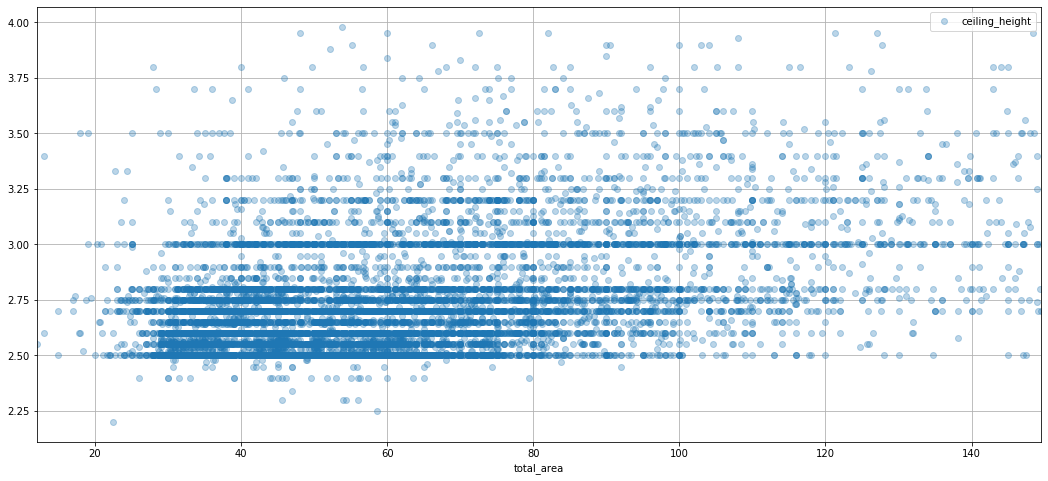

In [29]:
# Основной диапазон объявлений находится с ценами до 600000 руб/м2 и площадями до 150 м2
# Проверяем распределение числа объявлений по соотношению 'высота потолка / общая площадь' в этом диапазоне:
(df_real_estate
     .query('price_sqm < 600000 and total_area < 150 and 2 < ceiling_height < 4')
     .plot(x='total_area' , y = 'ceiling_height' , style='o', alpha=.3, figsize=(18, 8), sharex=False,  grid=True)   
 #.plot(x='total_area' , y = 'ceiling_height' , kind='hexbin', gridsize=50, sharex=False, figsize=(9, 6), grid=True)
)

вывод: возможные сегменты по высоте потолка:
до 2.65
2.65-2.90
2.90-3.10
3.10-3.30
выше 3.30

### Какие факторы больше всего влияют на стоимость квартиры? 
Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), 
удалённости от центра и даты размещения: дня недели, месяца и года.

##### зависимость цены от числа комнат:

In [30]:
# зависимость цены от числа комнат:
# для получения достоверных данных отбираем группы с числом объявлений болеше 100
df_real_estate['rooms'].value_counts() > 100
# проводим группировку по диапазону до 6 комнат
(df_real_estate
    .query('rooms < 6')
    .groupby('rooms')['price_sqm'].median()
)

rooms
0   105,326.80
1   100,000.00
2    92,807.42
3    88,943.63
4    92,473.12
5    96,517.07
Name: price_sqm, dtype: float64

**Вывод: число комнат относительная характеристика, косвенно чем больше число комнат, тем больше общая площадь квартиры.
При увеличении числа комнат до 3, стоимость м2 падает с 105 до 89 т.р.,
в дальнейшем с увеличением числа комнат стоимость м2 начинает расти до 96 т.р. для 5 комнатных квартир.


#####  зависимость цены от этажа

In [31]:
# проводим группировку по диапазону до 6 комнат
df_real_estate.groupby('floor_level')['price_sqm'].agg(['median', 'count'])

,median,count
floor_level,,
другой,"98,275.86",17319
первый,"81,236.81",2908
последний,"87,705.14",3323


In [32]:
(df_real_estate
    .pivot_table(index='segment_price', columns='floor_level', 
                 values='price_sqm', aggfunc=('median', 'count'))
)

count                      median  \
floor_level                        другой первый последний     другой   
segment_price                                                           
1. дешевый :60                       1471    693       719  47,233.47   
2. средний-малогабарит 60:140/:80   11994   1860      1893  97,222.22   
3. средний - улучшенный 60:140/80:   1909    224       386 100,000.00   
4. премиум-малогабарит 140:/0:80     1044     69       152 155,894.03   
5. премиум 140:/80:                   774     46       158 177,260.70   

                                                          
floor_level                            первый  последний  
segment_price                                             
1. дешевый :60                      42,218.54  42,393.94  
2. средний-малогабарит 60:140/:80   87,064.33  91,230.55  
3. средний - улучшенный 60:140/80:  90,155.58  96,362.43  
4. премиум-малогабарит 140:/0:80   155,882.35 156,851.03  
5. премиум 140:/80:                159,557.16 177,767.61

**Вывод: в целом по рынку есть закономерность: самая низкая цена для квартир на 1-м этаже, 
самая высокая цена для квартир между первым и последним этажами, в категории "другой". 
Премия к цене за этажность в целом по рынку по отношению к цене первого этажа составляет 8% для последнего и 21% для остальных.
***
При делении по ценовым сегментам рынка разницав премии уже не так выражена.
Премия к цене между первым и "другим" этажом составляет около 11%.
***
Особенности: 
для дешевых квартир (до 60 т.р./м2) разница в цене первого и последнего этажа отсутствует
для дорогих квартир (от 140 т.р./м2) и площадью до 80 м2 этажность не влияет на стоимость м2


#####  зависимость цены от года, месяца, дня недели

In [33]:
# для основного исследования построим линейные грфики с данными по годам
# сперва проверим распреление показателей погодично:
df_real_estate.groupby('year')['price_sqm'].agg(['median', 'count'])

,median,count
year,,
2014,"106,901.90",136
2015,"93,364.78",1166
2016,"91,704.89",2744
2017,"92,558.98",8155
2018,"95,693.78",8485
2019,"103,138.43",2864


В 2014 году очень мало объявлений, видимо сервис только начал работу. В 2015-2018 уровень цен находился примерно на одном уровне 92 - 96 т.р. В 2019 начался резкий рост цен - до 103 т.р., возможно этот рост начался уже в 2018 году.
Для дальнейшего исследования зависимости цен по месяцам и дням недели отбрасываем данные 2014г. в связи с малым числом объявлений и 2019 в связи с резким отклонением цены.

Text(0.5, 1.0, 'цена м2 по дням недели')

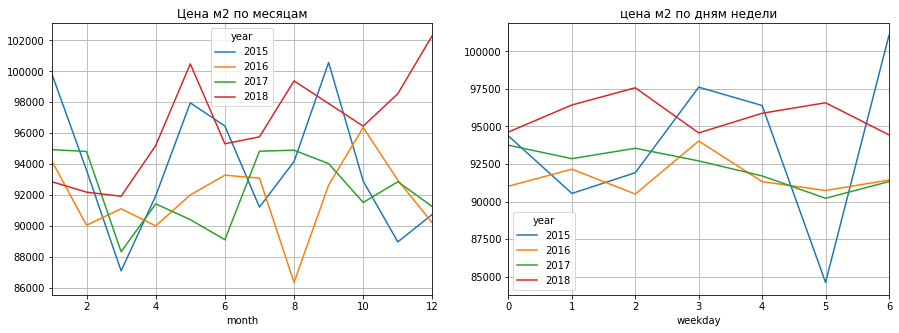

In [34]:
fig, axs=plt.subplots(1, 2, figsize=(15,5))
# вывод графиков зависимости цены от месяца
(df_real_estate
    .query('2014 < year < 2019')
    .pivot_table(index='month', columns='year', 
                 values='price_sqm', aggfunc='median')
    .plot(grid=True, ax=axs[0])
)
# вывод графиков зависимости цены от дня недели
(df_real_estate
    .query('2014 < year < 2019')
    .pivot_table(index='weekday', columns='year', 
                 values='price_sqm', aggfunc='median')
    .plot(grid=True, ax=axs[1])
)
axs[0].set_title('Цена м2 по месяцам')
axs[1].set_title('цена м2 по дням недели')

In [35]:
(df_real_estate
    .query('2014 < year < 2019')
    .pivot_table(index='weekday', columns='year', 
                 values='price_sqm', aggfunc='median'))
    

year,2015,2016,2017,2018
weekday,,,,
0,"94,364.46","91,025.64","93,750.00","94,632.77"
1,"90,540.54","92,156.86","92,857.14","96,433.87"
2,"91,920.66","90,501.44","93,548.39","97,578.75"
3,"97,619.05","94,033.61","92,706.47","94,570.74"
4,"96,396.54","91,325.25","91,705.80","95,880.16"
5,"84,610.47","90,734.96","90,217.39","96,579.48"
6,"101,070.30","91,429.95","91,327.88","94,444.44"


**Выводы:**
***
В 2015-2018 уровень цен находился примерно на одном уровне 92 - 96 т.р. 
В 2019 начался резкий рост цен - до 103 т.р., этот рост начался с декабря 2018 г.
***
Самые низкие цены в пределах года характерны для марта. Небольшое снижение бывает в июле-августе
В 2015-2017 цены снижались и к новому году, повышения цен были характерны для мая и сентября.
Для остальных месяцев динамика разнонаправленная.
***
Влияние дня недели на цену разнонаправленное для периода 2015-2017 и 2018г.
Для первого периода минимумы Вт-Ср, Сб и рост средних цен в четверг.
Наиболее выражена динамика в 2015г. - резкий минимум цен в Сб и максимум в Вс - диапазон от 85т.р. до 101т.р.
C 2018г. колебания цен по дням недели незначительны, от 94.5 т.р. до 97.5 т.р. (около 3%) и мугут быть случайны. 

#####  Зависимость цены от удаленности от центра

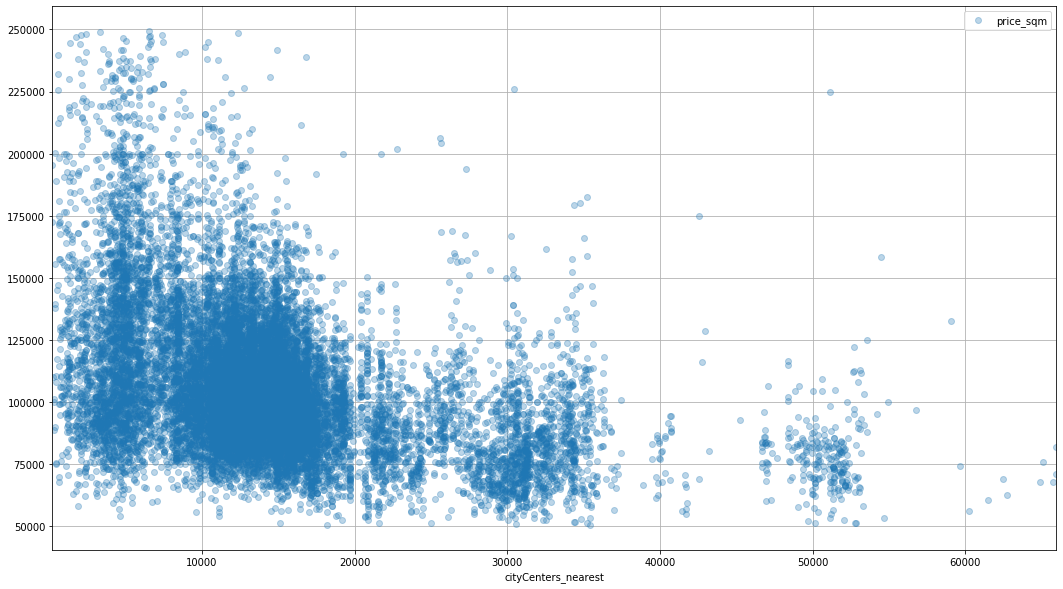

In [36]:
(df_real_estate
    .query(' 50000 < price_sqm < 250000')
    .plot(x='cityCenters_nearest' , y = 'price_sqm' , style='o', alpha=.3, figsize=(18, 10), sharex=False,  grid=True)
)

График создавался итерациями в нескольких масштабах, оставлен итоговый с характерными значениями.

**Выводы:
Зависимость стоимости от расстояния до городского центра есть. 
Максимальные значения стоимости характерны для квартир до 15 км от центра.
На расстоянии боле 20 км. стоимость квартир редко превышает 140 тыс.руб/м2.
Видно пять уплотнений концентрации предложений в районе 5 км, самое большое "пятно" от 8 до 20 км. И несколько малых групп на 22, 28-35 и 50 км. Что может быть связано с определенными населенными пунктами в пригороде.


### Цена квадратного метра в пригородах.
**10 населённых пунктов с наибольшим числом объявлений
используем метод визуализации данных графиком boxplot и описание методом describe

In [37]:
# Во Всеволожске есть уникальная квартира площадью 38м2 и ценой 640т.р/м2 сильно отклоняющаяся от выборки
# для этого исследования ее удаляем из базы
df_real_estate.drop(
    df_real_estate.loc[(df_real_estate['locality_name'] == 'Всеволожск') & (df_real_estate['price_sqm'] > 600000)].index[0],
    inplace=True)
df_real_estate.reset_index(drop=True, inplace=True)

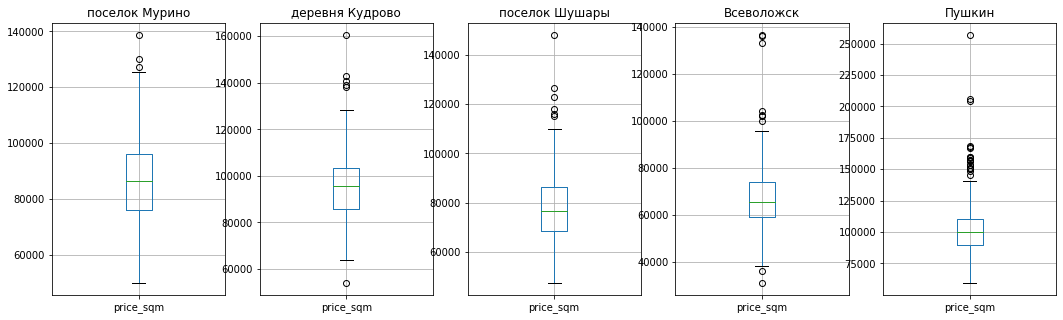

In [38]:
# создаем список TOP-10 населенных пунктов с наибольшим числом объявлений (кроме СПб) 
list_city = list(df_real_estate['locality_name'].value_counts()[1:11].index)
# строим графики для первых пяти населенных пунктов
fig, axs = plt.subplots(1, 5, figsize=(18,5))

for i in range(5):    
    df_real_estate.query('locality_name == @list_city[@i]').boxplot('price_sqm', ax=axs[i])
    axs[i].set_title(list_city[i])

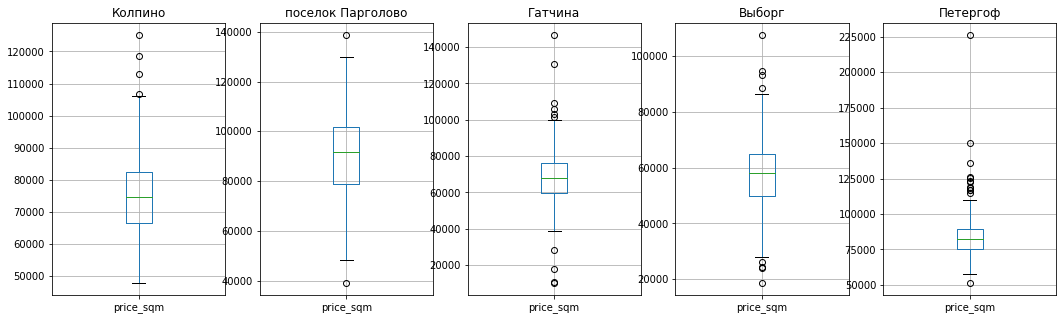

In [39]:
# строим графики для оставшихся пяти населенных пунктов
fig, axs = plt.subplots(1, 5, figsize=(18,5))
for i in range(5, 10):    
    df_real_estate.query('locality_name == @list_city[@i]').boxplot('price_sqm', ax=axs[i-5])
    axs[i-5].set_title(list_city[i])

In [40]:
df_prigorod = pd.DataFrame(index = list(df_real_estate.price_sqm.describe().index))

for city in list_city:    
    df_prigorod[city] = list(df_real_estate.query('locality_name == @city').price_sqm.describe())

df_prigorod

,поселок Мурино,деревня Кудрово,поселок Шушары,Всеволожск,Пушкин,Колпино,поселок Парголово,Гатчина,Выборг,Петергоф
count,586.00,470.00,439.00,397.00,369.00,338.00,327.00,307.00,237.00,201.00
mean,"86,041.12","95,260.85","78,551.34","67,214.25","103,125.82","75,424.58","90,175.91","68,746.15","58,141.91","84,757.56"
std,"14,724.50","13,574.39","14,052.98","12,820.68","21,598.35","12,055.60","17,249.13","14,665.18","12,759.48","17,578.65"
min,"50,000.00","54,160.35","47,700.42","31,400.00","59,836.07","47,957.37","39,205.96","10,507.25","18,750.00","51,612.90"
25%,"76,079.93","85,648.75","68,434.75","59,126.98","90,000.00","66,666.67","78,891.13","59,885.06","50,000.00","75,057.74"
50%,"86,250.38","95,555.31","76,829.27","65,789.47","100,000.00","74,723.75","91,642.86","67,796.61","58,158.32","82,142.86"
75%,"95,936.05","103,548.92","86,527.66","74,074.07","110,526.32","82,577.01","101,738.04","76,341.80","65,000.00","89,393.94"
max,"138,580.25","160,401.00","147,826.09","136,423.84","256,521.74","125,000.00","138,522.43","146,315.79","107,473.12","225,971.73"


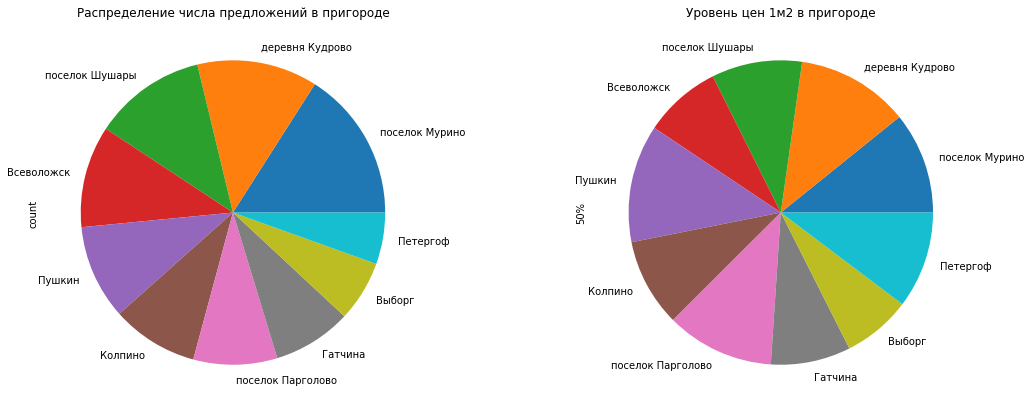

In [41]:
fig, axs=plt.subplots(1, 2, figsize=(18,7))
df_prigorod.iloc[0].plot( kind='pie', ax=axs[0],  title='Распределение числа предложений в пригороде')
df_prigorod.iloc[5].plot( kind='pie', ax=axs[1], title='Уровень цен 1м2 в пригороде')

**Вывод:
Наибольшее число предложений по продаже в Мурино, Кудрово и Шушарах.
Наибольшая цена м2 в Пушкино и Кудрово - медиана 100 т.р. и 95.5 т.р. соответственно.
Самая низкая цена м2 Выборг, Всеволожск и Гатчина соответственно: 58, 66 и 68 т.р.
Наибольший разброс цен на квартиры в Пушкине и Петергофе - станд. отклонение цен соответственно 21 и 17 т.р.
Ценовые максимумы имеются во Всеволожске 640 т.р (эта позиция была отфильтрована), Пушкин - 256 т.р., Петергоф - 226 т.р.

### Сегменты типичных квартир в центре

•	Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. 
Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений.
Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

Границы по удаленности от центра были выявлены в предыдущем исседовании. 
Его выводы согласуются с разделением по ценовым классам. Устанавливаем следующие границы по удаленности от центра:
1. центр - до 8 км
2. город - от 8 до 20 км
3. пригород ближний - от 20 до 40 км.
4. пригород дальний - от 40 км

##### Вводим категории по расстоянию от центра -  'segment_dist' 

In [42]:
def segment_locality(dist):
    try:
        if dist < 8000 :
            return('1.центр')
        elif 8000 <= dist < 20000 :
            return('2.город')
        elif 20000 <= dist < 40000 :
            return('3.пригород ближний')
        else:   
            return('4.пригород дальний')
    except:
        return(np.nan)
df_real_estate['segment_dist'] = df_real_estate.apply(lambda dist: segment_locality(dist['cityCenters_nearest']),  axis=1) 

# проверка репрезентативности выделенных сегментов:
df_real_estate['segment_dist'].value_counts()

2.город               11746
4.пригород дальний     5799
1.центр                3691
3.пригород ближний     2313
Name: segment_dist, dtype: int64

In [43]:
# выборки получились соответствующими требованиям (не менее 1000 предложений)
# значимые факторы для цены квартир были выявлены ранее. создаем сводную таблицу по группам
# итоговая таблица с выявленными значимыми параметрами:
(df_real_estate
     .groupby('segment_dist')
     .agg({'total_images':'count', 'rooms':'median','ceiling_height':'median', 'is_apartment' : 'mean', 
     'total_area':'median', 'proportion_kitchen':'median', 'proportion_living':'median', 'balcony':'median',
     'price_sqm':'median', 'last_price':'median', 'days_exposition':'median', 
     'cityCenters_nearest':'median'
     })
)

,total_images,rooms,ceiling_height,is_apartment,total_area,proportion_kitchen,proportion_living,balcony,price_sqm,last_price,days_exposition,cityCenters_nearest
segment_dist,,,,,,,,,,,,
1.центр,3691,3,3.00,0.00,77.30,0.15,0.60,0.00,"123,529.41","9,000,000.00",140.00,"4,813.00"
2.город,11746,2,2.60,0.00,49.73,0.18,0.56,1.00,"101,653.72","4,900,000.00",88.00,"13,469.50"
3.пригород ближний,2313,2,2.60,0.01,51.00,0.17,0.57,1.00,"83,333.33","4,200,000.00",99.00,"29,367.00"
4.пригород дальний,5799,2,2.60,0.00,46.20,0.18,0.57,1.00,"61,627.91","2,850,000.00",94.00,"50,649.00"


Text(0.5, 1.0, 'Сегменты выс. потолка / цена м2')

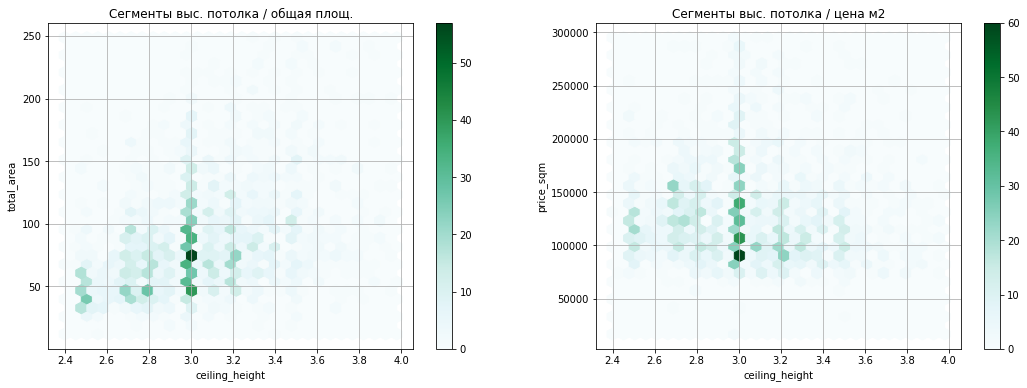

In [44]:
# Строим ячеечную диаграмму для выделения сегментов в центре города
# по основным параметрам высота потолков, общая площадь, доля площади кухни, расстояние от центра

# диаграммы по соотношениям высота потолков / общая площадь , высота потолков / цена м2
fig, axs=plt.subplots(1, 2, figsize=(18,6))
(df_real_estate
    .query('cityCenters_nearest < 8000 and total_area <250 and 2 < ceiling_height< 4')
    .plot(x= 'ceiling_height', y = 'total_area'  , kind='hexbin', sharex=False, gridsize=30, ax = axs[0], grid=True)
)
(df_real_estate
    .query('cityCenters_nearest < 8000 and 2 < ceiling_height< 4 and price_sqm <300000')
    .plot(x='ceiling_height' , y = 'price_sqm' , kind='hexbin', sharex=False, gridsize=30, ax = axs[1], grid=True)
)
axs[0].set_title('Сегменты выс. потолка / общая площ.')
axs[1].set_title('Сегменты выс. потолка / цена м2')

**Вывод:** четко видны полосы для значений высоты потолка 2.5, 2.8, 3 и размытая область выше 3м, что вполне объяснимо, поскольку высота потолка определяется типовыми проектами. Пожалуй лучшая характеристика для сегментирования рынка. По этому критерии можно выделить застройку хрущевского периода и т.д.
Ценовой максимум для квартир с потолком менее 3 м редко поднимается выше 160 т.р./м2.
Наибольший разброс цены, общей площади и наибольшее число предложений в секторе с высотой потолков 3 м.
Наиболее типовая квартира имеет параметры: высота потолка 3м., общая площадь 80 +- 30 м2, цена от 90 т.р./м2

Text(0.5, 1.0, 'Доля площади жилой / цена м2')

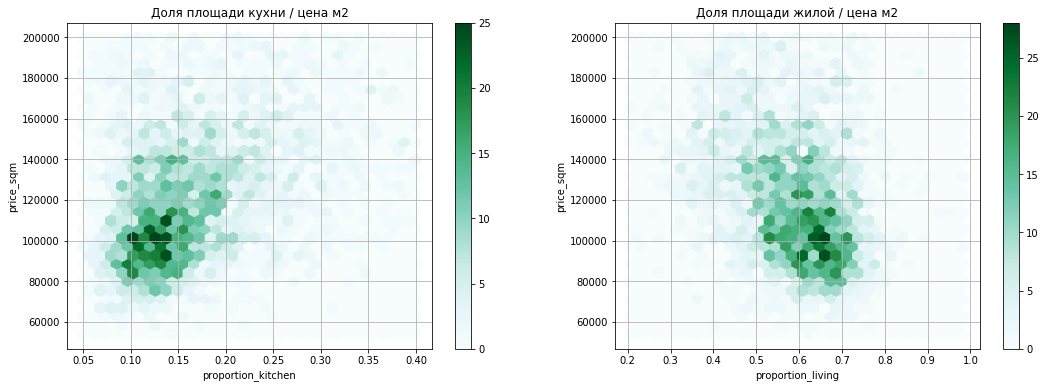

In [45]:
# Строим ячеечную диаграмму для выделения сегментов в центре города
# диаграммы по соотношениям: цена м2 / доля площади кухни, доля площади жилой

fig, axs=plt.subplots(1, 2, figsize=(18, 6))
(df_real_estate
    .query('cityCenters_nearest < 8000 and 50000 < price_sqm < 200000 and 0.05 < proportion_kitchen < 0.4')
    .plot(x='proportion_kitchen' , y = 'price_sqm' , kind='hexbin', sharex=False, gridsize=30, ax = axs[0], grid=True)
)
(df_real_estate
    .query('cityCenters_nearest < 8000 and 50000< price_sqm < 200000 and proportion_living > 0.2')
    .plot(x='proportion_living' , y = 'price_sqm' , kind='hexbin', sharex=False, gridsize=30, ax = axs[1], grid=True)
)
axs[0].set_title('Доля площади кухни / цена м2')
axs[1].set_title('Доля площади жилой / цена м2')

**Выводы:** 
Цена стоимости 1 м2  и доли площади кухни имеют положительную кореляцию.
Для связи цены 1м2 и доли жилой площади более выражена отрицательная корреляция, т.е для более дорогих квартир доля жилой площади может быть меньше, возможно в связи с их большей общей площадью увеличивается доля вспомогательных помещений.

Text(0.5, 1.0, 'Цена м2 / близость к центру города')

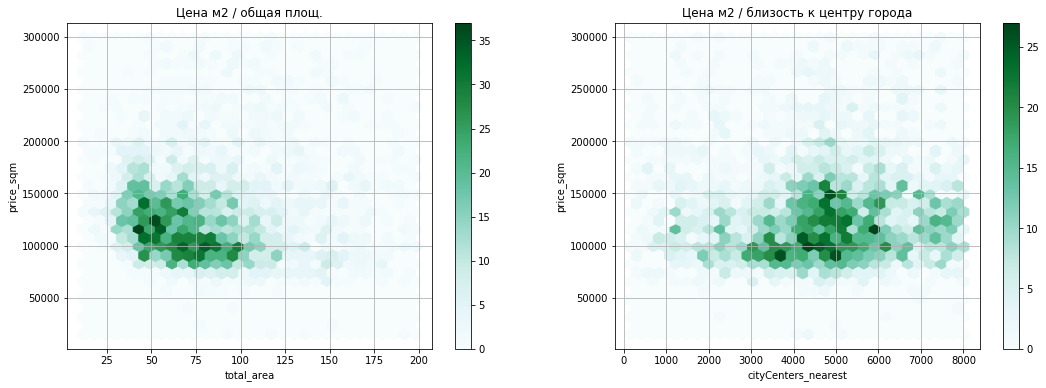

In [46]:
# Строим ячеечную диаграмму для выделения сегментов в центре города
# диаграммы по соотношениям: цена м2 / доля площади кухни, доля площади жилой

fig, axs=plt.subplots(1, 2, figsize=(18, 6))
(df_real_estate
    .query('cityCenters_nearest < 8000 and price_sqm <300000 and total_area < 200')
    .plot(x='total_area' , y = 'price_sqm' , kind='hexbin', sharex=False, gridsize=30, ax = axs[0], grid=True)
)
(df_real_estate
    .query('cityCenters_nearest < 8000 and price_sqm <300000')
    .plot(x='cityCenters_nearest' , y = 'price_sqm' , kind='hexbin', sharex=False, gridsize=30, ax = axs[1], grid=True)
)
axs[0].set_title('Цена м2 / общая площ.')
axs[1].set_title('Цена м2 / близость к центру города')

**Выводы:**
цена м2 практически не зависит от общей плащади, есть и низкая и высокая цена м2 для квартир любой площади.
интересная картина цены м2 для распределения в центре города, наибольшее число дорогих (от 150 т.р. предложений находится на удалении от 3 до 7 км. от центра города. При этом в самом центре до 3 км достаточно предложений с ценой 60-150 т.р. / м2

In [47]:
corr_columns = ['rooms','ceiling_height',  
     'total_area', 'proportion_kitchen', 'proportion_living', 'balcony',
     'price_sqm', 'days_exposition', 'cityCenters_nearest']

# для полученной сводной таблицы вычисляем коэффициенты корреляции цены м2 с основными параметрами:
print('{:<20} | {:>15} | {:>15}'.format('Показатель', 'По всей выборке', 'По центру города'))
print('-' * 60)
for col in list(corr_columns):
    (print('{:<20} | {:>15.2f} | {:>15.2f}'
           .format(col, df_real_estate['price_sqm'].corr(df_real_estate[col]), 
           df_real_estate.loc[df_real_estate['segment_dist'] =='1.центр' ].price_sqm.corr(df_real_estate[col])))
    )

Показатель           | По всей выборке | По центру города
------------------------------------------------------------
rooms                |            0.04 |           -0.03
ceiling_height       |            0.37 |            0.14
total_area           |            0.29 |            0.22
proportion_kitchen   |            0.17 |            0.16
proportion_living    |           -0.16 |           -0.16
balcony              |            0.07 |            0.17
price_sqm            |            1.00 |            1.00
days_exposition      |            0.05 |            0.05
cityCenters_nearest  |           -0.35 |           -0.01


##### Выводы:
Условно центральной частью города можно считать недвижимость на расстоянии 8 км. от центра.
***
В центре города квартиры отличаются  высокими потолками 3м и большой площадью, в среднем 77м2, но продаются значительно дольше около 140 дней. Средняя цена м2 - 123 т.р. и общая цена такой типовой квартиры 9000 т.р.
Типовая квартира  в центре имеет параметры: высота потолка 3м., общая площадь 80 +- 30 м2, цена от 90 т.р./м2
***
По мере удаления от центра цена падает до 101 т.р. в пределах города и до 83 т.р. 61 т.р. в ближнем и дальнем пригороде соответственно.
Физические свойства квартир при этом сходные - высота потолков 2,6 м, общая площадь 46-51 м2. 
Срок экспозиции гораздо меньше чем у квартир в центре - 88-99 дней.
***
Лучшая характеристика для сегментирования рынка - высота потолков. Четко видны полосы для значений высоты потолка 2.5, 2.8, 3 и размытая область выше 3м, по этому признаку можно выделить тип застройки и ее качество (хрущевского периода и т.д.)
***
Цена стоимости 1 м2  и доли площади кухни имеют положительную кореляцию.
Для связи цены 1м2 и доли жилой площади более выражена отрицательная корреляция, т.е для более дорогих квартир доля жилой площади может быть меньше, возможно в связи с их большей общей площадью увеличивается доля вспомогательных помещений.
***
Цена м2 практически не зависит от общей плащади, есть и низкая и высокая цена м2 для квартир любой площади.
интересная картина цены м2 для распределения в центре города, наибольшее число дорогих (от 150 т.р. предложений находится на удалении от 3 до 7 км. от центра города. При этом в самом центре до 3 км достаточно предложений с ценой 60-150 т.р. / м2
***
Корреляция между ценой м2 и характеристиками квартиры в центре города и всей выборки идентична кроме двух параметров:
высота потолков и расстояние от центра.
Для квартир в центре параметр расстояния перестает играть значение, что логично посокльку по этому параметру и сделан отбор.
При этом коэф. корреляции стоимости и высоты потолков падает с 0.37 во всей выборке до 0.14 в центре, что вызвано ростом доли квартир с высоким потолком в центре города. 

### Характерные параметры для апартаментов, студий и квартир свободной планировки

•	Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. 
Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

In [48]:
spec_list = ['rooms', 'is_apartment', 'studio', 'open_plan', 'ceiling_height',
             'total_area', 'proportion_kitchen', 'balcony',
             'price_sqm', 'days_exposition', 'cityCenters_nearest']

df_apartment = pd.DataFrame(
    index = list(df_real_estate[spec_list].median().index), 
    data=list(df_real_estate[spec_list].query('is_apartment == True').median()), columns = ['apartment']             
)
df_apartment['studio'] = list(df_real_estate[spec_list].query('studio == True').median())
df_apartment['open_plan'] = list(df_real_estate[spec_list].query('open_plan == True').median())
df_apartment['standart'] = list(
    df_real_estate[spec_list].query('is_apartment != True and studio!=True and open_plan != True').median())
df_apartment

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


,apartment,studio,open_plan,standart
rooms,2.00,0.00,0.00,2.00
is_apartment,1.00,0.00,0.00,0.00
studio,0.00,1.00,0.00,0.00
open_plan,0.00,0.00,1.00,0.00
ceiling_height,3.00,2.70,2.77,2.65
total_area,64.00,26.02,27.10,52.00
proportion_kitchen,0.22,nan,nan,0.17
balcony,2.00,2.00,2.00,1.00
price_sqm,"113,866.50","105,306.96","102,222.22","94,827.59"
days_exposition,78.00,55.50,45.00,96.00


##### Выводы:
Для новых форматов недвижимости апартаменты/студии/свободная планировка по сравнению со стандартной характерны большая высота потолков 3.0 м у артаментов, 2.7-2.77 м для студий и свободной планировки против 2.65 у стандартной.
У студий и свободной планировки гораздо меньшая общая площадь чем у других сегментов 26-27 м2 против 52 у стандартных квартир, у апартаментов напротив средня площадь больше - 64 м2.
Наиболее ликвидны студии и квартиры свободной планировки 45-55 дней против 78 у апартаментов и 96 у стандартных.
У апартаментов доля площади площади кухни составляет 22% против 17% у стандартных квартир, разница существенна - 35%.


### Задание 2. Общие выводы по проекту

•	Типичные параметры продаваемых квартир.
***
Наиболее массовый сегмент рынка недвижимости СПб- квартиры площадью 30-70 м2 и ценой от 60 до 120 тыс.руб/м2.
Четко просматриваются группировки объвлений для квартир общей площадью 35, 45 и 60м2, что указывает на преобладание на рынке определенных типовых квартир.

Два основных параметра вляющих на стоимость квартиры это высота потолков и общая площадь квартиры.
дешевые квартиры 45 т.р/м2 имеют типовые параметры: потолок 2.55 м и площадь 51 м2
квартиры до 80м2 и ценой 95 т.р/м2 - соответственно 2.6м и 46 м2. как видим высота потолка ценится выше площади.
квартиры свыше 80м2 и ценой 98 т.р./м2 - 2,88м и 97 м2
квартиры до 80м2 и ценой 155 т.р/м2 -  2.8м и 50 м2
квартиры свыше 80м2 и ценой 176 т.р./м2 - 3,00м и 114 м2

Для более дорогих квартир соразмерной площади характерна более высокая доля площади кухни 18% и 23% для квартир до 80м2, 13% и 15% для квартир площадью более 80м2
Более ликвидны квартиры малой площади до 80м2 - 85-100 дней экспозиции.
Квартиры площадью более 80 продаются почти в два раза дольше - около 150-180 дней.
Дешевое жилье (низкие потолки, цена до 60 т.р.) также менее ликвидно чем массовый сектор - экспозиция в среднем 103 дня.

Наиболее выражена сегментация рынка по соотношению площади и высоте потолков квартир.
Возможные сегменты для исследования зависимостей по высоте потолка:
до 2.65, 2.65-2.90, 2.90-3.10, 3.10-3.30, выше 3.30
***
***
•	Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.
***
Все квартиры с аномально высокой ценой отличаются высокими потолками, большинство от 3,5 м, и находятся  близко к центру города, остальные характеристики очень разнообразны. Объявления с квартирами имеющими высоту потолка более 10м. (25шт.) были отсечены на этапе подготовки данных.
***
***
•	Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.
***
**Зависимость цены от числа комнат.

Число комнат относительная характеристика, как правило, чем больше число комнат, тем больше общая площадь квартиры. Сами комнаты могут быть и маленькими и большими. При увеличении числа комнат до 3, стоимость м2 падает с 105 до 89 т.р., в дальнейшем с увеличением числа комнат стоимость м2 начинает расти до 96 т.р. для 5 комнатных квартир.
***
**Зависимость цены от этажа.

Есть закономерность: самая низкая цена для квартир на 1-м этаже, самая высокая цена для квартир между первым и последним этажами, в категории "другой". 
Премия к цене за этажность (к цене первого этажа) составляет 8% для последнего этажа и 21% для остальных. У более дорогих квартир разница в премии за этаж уже не так выражена.
В среднем  по рынку премия к цене между первым и "другим" этажом составляет около 11%.
***
Особенности: 
для дешевых квартир (до 60 т.р./м2) разница в цене первого и последнего этажа отсутствует
для дорогих квартир (от 140 т.р./м2) и площадью до 80 м2 этажность не влияет на стоимость м2
***
**Зависимость цены от года, месяца, дня недели

В 2014 году было опубликовано очень мало объявлений, видимо сервис только начал работу. 
В 2015-2018 уровень цен находился примерно на одном уровне 92 - 96 т.р. 
В 2019 начался резкий рост цен - до 103 т.р., этот рост начался с декабря 2018 г.
Самые низкие цены в пределах года характерны для марта. Небольшое снижение бывает в июле-августе
В 2015-2017 цены снижались и к новому году, повышения цен были характерны для мая и сентября.
Для остальных месяцев динамика разнонаправленная.
***
**Влияние дня недели на цену разнонаправленное для периода 2015-2017 и 2018г.

Для первого периода характерны минимумы цены в Вт-Ср, Сб и рост средних цен в четверг.
Наиболее выражена динамика в 2015г. - резкий минимум цен в Сб и максимум в Вс - диапазон от 85т.р. до 101т.р.
C 2018г. колебания цен по дням недели незначительны, от 94.5 т.р. до 97.5 т.р. (около 3%) и могут быть случайными.
Зависимость цены от удаленности от центра.
Зависимость стоимости от расстояния до городского центра сильно выражена. 
Максимальные значения стоимости м2 характерны для квартир находящихся в пределах 15 км от центра.
На расстоянии более 20 км. стоимость квартир редко превышает 140 т.р./м2.
Видно пять уплотнений концентрации предложений в районе 5 км, самое большое "пятно предложений" в диапазоне от 8 до 20 км. И несколько малых групп на 22, 28-35 и 50 км. Что может быть связано с определенными населенными пунктами в пригороде.
***
***
•	Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.
***
Наибольшее число предложений по продаже в Мурино, Кудрово и Шушарах. Наибольшая цена м2 в Пушкино и Кудрово - медиана 100 т.р. и 95.5 т.р. соответственно. Самая низкая цена м2 в Выборге, Всеволожске и Гатчине, соответственно: 58, 66 и 68 т.р. 
Наибольший разброс цен на квартиры в Пушкине и Петергофе - станд. отклонение цен соответственно 21 и 17 т.р. 
Ценовые максимумы имеются во Всеволожске 640 т.р (эта позиция была отфильтрована), Пушкин - 256 т.р., Петергоф - 226 т.р.
***
***
•	Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.
***
**Условно центральной частью города можно считать недвижимость на расстоянии 8 км. от центра.

***
В центре города квартиры отличаются  высокими потолками 3м и большой площадью, в среднем 77м2, но продаются значительно дольше около 140 дней. Средняя цена м2 - 123 т.р. и общая цена такой типовой квартиры 9000 т.р.
**Типовая квартира  в центре имеет параметры: высота потолка 3м., общая площадь 80 +- 30 м2, цена от 90 т.р./м2

***
По мере удаления от центра цена падает до 101 т.р. в пределах города и до 83 т.р. 61 т.р. в ближнем и дальнем пригороде соответственно.
Физические свойства квартир при этом сходные - высота потолков 2,6 м, общая площадь 46-51 м2. 
Срок экспозиции гораздо меньше чем у квартир в центре - 88-99 дней.
***
Лучшая характеристика для сегментирования рынка - высота потолков. Четко видны полосы для значений высоты потолка 2.5, 2.8, 3 и размытая область выше 3м, по этому признаку можно выделить тип застройки и ее качество (хрущевского периода и т.д.)
***
Цена стоимости 1 м2  и доли площади кухни имеют положительную кореляцию.
Для связи цены 1м2 и доли жилой площади более выражена отрицательная корреляция, т.е для более дорогих квартир доля жилой площади может быть меньше, возможно в связи с их большей общей площадью увеличивается доля вспомогательных помещений.
***
Цена м2 практически не зависит от общей плащади, есть и низкая и высокая цена м2 для квартир любой площади.
Интересна картина цены м2 по удаленности в центре города, наибольшее число дорогих (от 150 т.р. предложений находится на удалении от 3 до 7 км. от центра города. При этом в самом центре, до 3 км, достаточно предложений с ценой 60-150 т.р. / м2
***
Корреляция между ценой м2 и характеристиками квартиры в центре города и всей выборки идентична кроме двух параметров:
высота потолков и расстояние от центра.
Для квартир в центре параметр расстояния перестает играть значение, что логично посокльку по этому параметру и сделан отбор.
При этом коэф. корреляции стоимости и высоты потолков падает с 0.37 во всей выборке до 0.14 в центре, что вызвано ростом доли квартир с высоким потолком в центре города.
***
***
•	Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.
***
Для новых форматов недвижимости апартаменты/студии/свободная планировка по сравнению со стандартной характерны большая высота потолков 3.0 м у артаментов, 2.7-2.77 м для студий и свободной планировки против 2.65 у стандартной.
У студий и свободной планировки гораздо меньшая общая площадь чем у других сегментов 26-27 м2 против 52 у стандартных квартир, у апартаментов напротив средня площадь больше - 64 м2.
Наиболее ликвидны студии и квартиры свободной планировки 45-55 дней против 78 у апартаментов и 96 у стандартных.
У апартаментов доля площади площади кухни составляет 22% против 17% у стандартных квартир, разница существенна - 35%.
